##Pokedex thingy

i just found out we're using the KNN model for the lab. Hence why i made a separate file for easier distinguishing.


In [15]:
#outdated code. I'm keeping it for reference.

'''
 def read_data_from_file(data_path, label):
    data = []  # List to hold tuples
    with open(data_path, "r") as file:
        next(file)  # Skip the first line
        for line in file:
            cleaned_line = line.strip().strip("()")  # removing the () from the line
            parts = cleaned_line.split(",")  # splitting the line into parts using comma
            if len(parts) == 2:  # Ensuring the line has exactly 2 parts
                try:
                    width, height = parts
                    width = round(float(width)) # converting to float and rounding
                    height = round(float(height))   # converting to float and rounding
                    data.append((width, height, label))  # appending a tuple with correct label
                except ValueError:
                    # In case conversion to float fails
                    print(f"Warning: Could not process line: {line}")
    return data

# Use for both Pikachu and Pichu
file_path_pikachu = r"C:\Users\Burai\Downloads\pikachu.txt"
file_path_pichu = r"C:\Users\Burai\Downloads\pichu.txt"

converted_data_pikachu = read_data_from_file(file_path_pikachu, "Pikachu")
converted_data_pichu = read_data_from_file(file_path_pichu, "Pichu")

# Example of how to print or process your converted data
for entry in converted_data_pikachu[:5]:  # Print first 5 entries for Pikachu
    print(entry)

for entry in converted_data_pichu[:5]:  # Print first 5 entries for Pichu
    print(entry)
'''

(18, 45, 'Pikachu')
(27, 41, 'Pikachu')
(26, 39, 'Pikachu')
(24, 40, 'Pikachu')
(21, 36, 'Pikachu')
(20, 29, 'Pichu')
(15, 27, 'Pichu')
(17, 28, 'Pichu')
(17, 34, 'Pichu')
(21, 31, 'Pichu')


Split the data in a 90/10 ratio for training and testing purposes.

save the 90% for training and 10% for testing in new .txt files 


In [12]:
#outdated code. I'm keeping it for reference.

""" def split_and_save_data(data, training_file_name, testing_file_name, ratio=0.1):
    
    
    # Calculate the split index
    split_index = int(len(data) * (1 - ratio))
    
    # Split the data
    data_for_training, data_for_testing = data[:split_index], data[split_index:]
    
    # Save the 80% training split to a file
    with open(training_file_name, "w") as file:
        for entry in data_for_training:
            file.write(f"{entry[0]}, {entry[1]}, {entry[2]}\n")  # Format: width, height, label

    # Save the 20% testing split to a file
    with open(testing_file_name, "w") as file:
        for entry in data_for_testing:
            file.write(f"{entry[0]}, {entry[1]}, {entry[2]}\n")  # Format: width, height, label

# 
split_and_save_data(converted_data_pikachu, "Data_pika_training.txt", "Data_pika_testing.txt")
split_and_save_data(converted_data_pichu, "Data_pichu_training.txt", "Data_pichu_testing.txt")
"""

Splitting the data, making sure it's in the format of "width", "height", and "label". 
Keeping label as pichu and pikachu for simplicity.

Not normalizing the entries in "Data_training.txt" and "Data_testing.txt" because the features share the same unit of measurement. (cm)
Also because there is not a huge difference in numerical values. 
This would not be the case if, for example, the data had lenght (cm) and weight (grams).


In [27]:
import random 
import re




def read_and_combine_data(file_path_pikachu, file_path_pichu):
    data = []  # List to hold all data
    # Function to read and append data
    def read_data(file_path, label):
        with open(file_path, "r") as file:
            next(file)  # Skip the header
            for line in file:
                cleaned_line = line.strip().strip("()")  # removing the () from the line
                parts = cleaned_line.split(",")  # splitting the line into parts using comma
                if len(parts) == 2:  # Ensuring the line has exactly 2 parts
                    try:
                        width, height = parts
                        width = round(float(width)) # converting to float and rounding
                        height = round(float(height))   # converting to float and rounding
                        data.append((width, height, label))  # appending a tuple with correct label
                    except ValueError:
                        # In case conversion to float fails
                        print(f"Warning: Could not process line: {line}")
                
    
    # Read and combine Pikachu and Pichu data
    read_data(file_path_pikachu, "Pikachu")
    read_data(file_path_pichu, "Pichu")
    return data

def split_and_save_data(data, training_file_name, testing_file_name, ratio=0.1):
    random.shuffle(data)  # Shuffle the combined data to ensure randomness
    split_index = int(len(data) * (1 - ratio))
    data_for_training, data_for_testing = data[:split_index], data[split_index:]
    
    with open(training_file_name, "w") as train_file:
        for entry in data_for_training:
            train_file.write(f"{entry[0]}, {entry[1]}, {entry[2]}\n")
    
    with open(testing_file_name, "w") as test_file:
        for entry in data_for_testing:
            test_file.write(f"{entry[0]}, {entry[1]}, {entry[2]}\n")


# Use for both Pikachu and Pichu
file_path_pikachu = r"C:\Users\Burai\Downloads\pikachu.txt"
file_path_pichu = r"C:\Users\Burai\Downloads\pichu.txt"

# Combine Pikachu and Pichu data
combined_data = read_and_combine_data(file_path_pikachu, file_path_pichu)

# Split and save the combined data
split_and_save_data(combined_data, "Data_training.txt", "Data_testing.txt")


##Formula

Euclidean Distance Formula
The Euclidean distance formula says:

d = √[ (x
2
 – x
1
)2 + (y
2
 – y
1
)2]

where,

(x
1
, y
1
) are the coordinates of one point.
(x
2
, y
2
) are the coordinates of the other point.
d is the distance between (x
1
, y
1
) and (x
2
, y
2
).



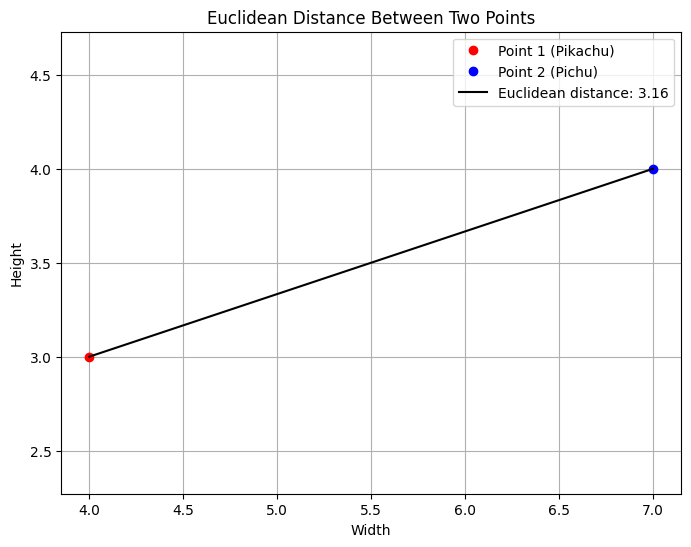

In [13]:
import math
import matplotlib.pyplot as plt ## i got the graph from GPT3. I'm not sure if it's correct. I'm keeping it for reference.
##This code was mainly used to help me understand the concept of euclidean distance. I'm keeping it for reference.

def euclidean_distance(point1, point2):
    """Calculate the Euclidean distance between two points."""
    return math.sqrt(sum((p - q) ** 2 for p, q in zip(point1, point2)))

# Points example
point1 = (4, 3)  # e.g., Pikachu
point2 = (7, 4)  # e.g., Pichu

# Calculate distance
distance = euclidean_distance(point1, point2)

# Plotting
plt.figure(figsize=(8, 6))
# Plot points
plt.plot(*point1, 'ro', label='Point 1 (Pikachu)')  # Red dot
plt.plot(*point2, 'bo', label='Point 2 (Pichu)')    # Blue dot
# Plot line between points
plt.plot([point1[0], point2[0]], [point1[1], point2[1]], 'k-', label=f'Euclidean distance: {distance:.2f}')

# Additional plot formatting
plt.xlabel('Width')
plt.ylabel('Height')
plt.title('Euclidean Distance Between Two Points')
plt.legend()
plt.grid(True)
plt.axis('equal')  # Equal aspect ratio ensures that the distance is represented accurately.

plt.show()


Graphy thingy!


[(19.0, 31.0, 'Pichu'), (18.0, 29.0, 'Pichu'), (24.0, 38.0, 'Pikachu'), (22.0, 35.0, 'Pichu'), (21.0, 27.0, 'Pichu')]


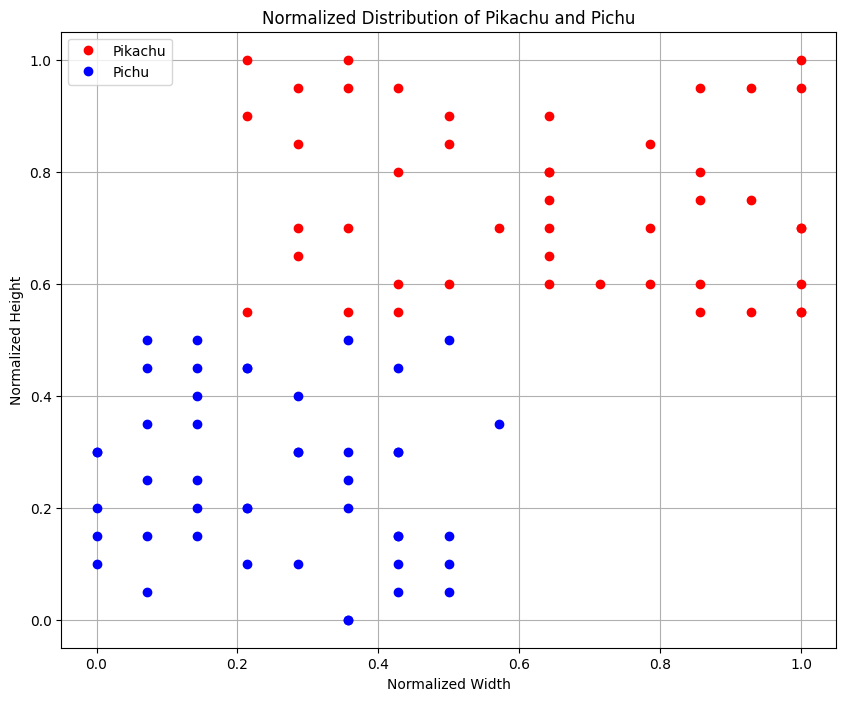

In [30]:
import matplotlib.pyplot as plt

def load_data_from_file(file_path):
    data = []  # List to hold all data tuples
    with open(file_path, "r") as file:
        for line in file:
            parts = line.strip().split(",")
            if len(parts) == 3:  # Ensure there are exactly three parts
                try:
                    width = float(parts[0])
                    height = float(parts[1])
                    label = parts[2].strip()  # Remove leading/trailing whitespaces.. WHY DOES A SPACE APPEAR?!?!
                    data.append((width, height, label))
                except ValueError as e:
                    print(f"Error processing line: {line}. Error: {e}")
    return data



training_file_path = "Data_training.txt"  
training_data = load_data_from_file(training_file_path)

#print(training_data[:5]) #test print. to confirm the data is valid.
#############################

# Extract width and height from training data as lists for plotting and normalization.
widths = [point[0] for point in training_data]
heights = [point[1] for point in training_data]

# Calculate min and max for width and height
min_width, max_width = min(widths), max(widths)
min_height, max_height = min(heights), max(heights)

# Normalize data. using ->  x_normalized_data = (x - x_min) / (x_max - x_min)


normalized_data = [
    ((width - min_width) / (max_width - min_width),
     (height - min_height) / (max_height - min_height),
     label)
    for width, height, label in training_data
]

#print(normalized_data[:5])  # test print to confirm the data is valid.


###############################




# Plotting the normalized data
plt.figure(figsize=(10, 8))

# Initialize lists to collect points for each label
pikachu_points = []
pichu_points = []

# Collect points based on labels
for width, height, label in normalized_data:
    if label == "Pikachu":
        pikachu_points.append((width, height))
    elif label == "Pichu":
        pichu_points.append((width, height))

# Plot points only if lists are not empty. Added this to avoid error when there's no data... but there still resulted in an empty graph.
if pikachu_points:
    plt.plot(*zip(*pikachu_points), 'ro', label='Pikachu')
if pichu_points:
    plt.plot(*zip(*pichu_points), 'bo', label='Pichu')

# Ensure there's data before calling legend
if pikachu_points or pichu_points:
    plt.legend()

plt.xlabel('Normalized Width')
plt.ylabel('Normalized Height')
plt.title('Normalized Distribution of Pikachu and Pichu')
plt.grid(True)

plt.show()



In [14]:
%%script false

import numpy as np

def euclidean_distance(instance1, instance2): # using numpy now.
    """
    Calculate the Euclidean distance between two data points.
    """
    return np.sqrt(np.sum((np.array(instance1) - np.array(instance2)) ** 2))

def knn(data, query, k, distance_fn, choice_fn):
    """
    k-nearest neighbors algorithm.
    """
    neighbor_distances_and_indices = []

    # For each example in the data
    for index, example in enumerate(data):
        # Example[:-1] is the feature set; example[-1] is the label
        distance = distance_fn(example[:-1], query)
        neighbor_distances_and_indices.append((distance, index))

    # Sort based on distance and select the first k entries
    sorted_neighbors = sorted(neighbor_distances_and_indices)

    # Extract the indices of the k nearest neighbors
    k_nearest_indices = [index for _, index in sorted_neighbors[:k]]
    
    # Voting mechanism: choose the most common label among the nearest neighbors
    k_nearest_labels = [data[i][-1] for i in k_nearest_indices]    
    return choice_fn(k_nearest_labels)

def mode(labels):
    """
    Return the most common label.
    """
    return max(set(labels), key=labels.count)

def load_data_from_file(file_path): # loading data from file. copypasted from the previous code. My idea is to possibly use this to save into "training_data" when users input their own data.
    data = []  # List to hold all data tuples
    with open(file_path, "r") as file:
        for line in file:
            parts = line.strip().split(",")
            if len(parts) == 3:  # Ensure there are exactly three parts
                try:
                    width = float(parts[0])
                    height = float(parts[1])
                    label = parts[2]
                    data.append((width, height, label))
                except ValueError as e:
                    print(f"Error processing line: {line}. Error: {e}")
    return data

def input_data():
    while True:  # Loop until valid input is received. ensuring that the user inputs a number.
        try:
            width = float(input("Enter width of the Pokemon: "))
            height = float(input("Enter height of the Pokemon: "))
            if width < 0 or height < 0:
                print("Please enter non-negative numbers.")
                continue  # This will cause the loop to start over if numbers are negative.
            query = (width, height)  # Successfully parsed inputs; form the query tuple
            return query  
        except ValueError:  
            print("Please enter valid numbers for width and height. Note that the input should be a number")  


# Load training data
training_file_path = "Data_training.txt"  
training_data = load_data_from_file(training_file_path)

query = input_data()  # Get the query point from the user

# Using KNN to predict the label of the new instance of data.

k = 3 #rounded to 9 as to not have an even number. avoiding ties.
predicted_label = knn(training_data, query, k, euclidean_distance, mode)

print(f"The predicted label is: {predicted_label}")


Please enter non-negative numbers.
The predicted label is:  Pichu


In [13]:
%%script false


np.sqrt(90) #source: Chatbot GPT3 when asked for conventional K value for KNN. Usually square root of the number of data points.

#using this for K value for KNN


9.486832980505138

In [15]:
%%script false 

def input_data():
    while True:  # Loop until valid input is received. ensuring that the user inputs a number.
        try:
            width = float(input("Enter width of the Pokemon: "))
            height = float(input("Enter height of the Pokemon: "))
            if width < 0 or height < 0:
                print("Please enter non-negative numbers.")
                continue  # This will cause the loop to start over if numbers are negative.
            query = (width, height)  # Successfully parsed inputs; form the query tuple
            return query  
        except ValueError:  
            print("Please enter valid numbers for width and height. Note that the input should be a number")  

# Call the function
query = input_data()





Please enter valid numbers for width and height. Note that the input should be a number
Please enter valid numbers for width and height. Note that the input should be a number
Please enter valid numbers for width and height. Note that the input should be a number
Please enter valid numbers for width and height. Note that the input should be a number

Main Menu
1. Option One
2. Option Two
3. Exit
Exiting the menu.


In [19]:
%%script false
def main_menu():
    while True:  # This creates an infinite loop, which we'll break out of when the user decides to exit.
        print("\nPikachu and Pichu Classifier!")
        print("1. Enter new data to classify.")
        print("2. Change K value for KNN.")
        print("3. View current K value")
        print("4. Exit")

        choice = input("Enter your choice (1-3): ")

        if choice == '1':
            print("blalba")
        elif choice == '2':
            print("K value change.")
        elif choice == '3':
            print("current K")
        elif choice == '4':
            print("Exit")
            break  
        else:
            print("Invalid choice. Please enter a number between 1 and 4.")

if __name__ == "__main__":
    main_menu()




Pikachu and Pichu Classifier!
1. Enter new data to classify.
2. Options.
3. Data
4. Exit
You selected Option Two.

Pikachu and Pichu Classifier!
1. Enter new data to classify.
2. Options.
3. Data
4. Exit
You selected Option Two.

Pikachu and Pichu Classifier!
1. Enter new data to classify.
2. Options.
3. Data
4. Exit
You selected Option One.

Pikachu and Pichu Classifier!
1. Enter new data to classify.
2. Options.
3. Data
4. Exit
Exiting the menu.


In [29]:
import numpy as np


def euclidean_distance(instance1, instance2):
    return np.sqrt(np.sum((np.array(instance1) - np.array(instance2)) ** 2))

def knn(data, query, k, distance_fn, choice_fn):  #squished for readability
    neighbor_distances_and_indices = []
    for index, example in enumerate(data):
        distance = distance_fn(example[:-1], query)
        neighbor_distances_and_indices.append((distance, index))
    sorted_neighbors = sorted(neighbor_distances_and_indices)
    k_nearest_indices = [index for _, index in sorted_neighbors[:k]]
    k_nearest_labels = [data[i][-1] for i in k_nearest_indices]    
    return choice_fn(k_nearest_labels)

def mode(labels):
    return max(set(labels), key=labels.count)

def load_data_from_file(file_path):
    data = []
    with open(file_path, "r") as file:
        for line in file:
            parts = line.strip().split(",")
            if len(parts) == 3:
                try:
                    data.append((float(parts[0]), float(parts[1]), parts[2].strip()))
                except ValueError as e:
                    print(f"Error processing line: {line}. Error: {e}")
    return data

def input_data():
    while True:
        try:
            width = float(input("Enter width of the Pokemon: "))
            height = float(input("Enter height of the Pokemon: "))
            if width < 0 or height < 0: #ensuring that the user inputs positive number.
                print("Please enter non-negative numbers.")
                continue
            return (width, height)
        except ValueError:
            print("Please enter valid numbers for width and height.")

def classify_pokemon():
    query = input_data()
    predicted_label = knn(training_data, query, k, euclidean_distance, mode)
    print(f"The predicted label is: {predicted_label}")

def evaluate_model(testing_data, k):
    correct_predictions = 0
    total_predictions = len(testing_data)

    for instance in testing_data:
        # Unpack the instance data. The last element is the true label, therefore -1 to exclude it.
        features, true_label = instance[:-1], instance[-1]
        # Predict the label using the KNN model
        predicted_label = knn(training_data, features, k, euclidean_distance, mode)
        print(f"Predicted: {predicted_label}, True: {true_label}")
        # Check if the prediction is correct
        if predicted_label == true_label.strip():
            correct_predictions += 1 #incrementing the correct predictions.

    # Calculate the accuracy
    accuracy = correct_predictions / total_predictions # TN + TP / TN + TP + FN + FP.
    print(f"Model accuracy on testing data: {accuracy:.2f}")


# Initialize or load training data and set default k
training_file_path = "Data_training.txt"
training_data = load_data_from_file(training_file_path)

testing_file_path = "Data_testing.txt"
testing_data = load_data_from_file(testing_file_path)

k = 3

def main_menu():
    global k  # To allow modification of k if implementing options to change it
    while True:
        print("\nPikachu and Pichu Classifier!")
        print("1. Enter new data to classify.")
        print("2. Change 'k' value for KNN.")
        print("3. Show current 'k' value.")
        print("4. Read testing data and evaluate the model.")
        print("5. Exit")

        choice = input("Enter your choice (1-5): ")

        if choice == '1':
            classify_pokemon()
        elif choice == '2':
            new_k = input("Enter new 'k' value: ")
            try:
                k = int(new_k)
                print(f"'k' value is now set to {k}.")
            except ValueError:
                print("Please enter a valid integer for 'k'.")
        elif choice == '3':
            print(f"Current 'k' value: {k}")
        elif choice == '4':
            evaluate_model(testing_data, k)
            break
        elif choice == '5':
            print("Exiting the menu.")
            break
        else:
            print("Invalid choice. Please enter a number between 1 and 5.")

if __name__ == "__main__":
    main_menu()



Pikachu and Pichu Classifier!
1. Enter new data to classify.
2. Change 'k' value for KNN.
3. Show current 'k' value.
4. Read testing data and evaluate the model.
5. Exit
Predicted: Pikachu, True: Pikachu
Predicted: Pichu, True: Pichu
Predicted: Pikachu, True: Pikachu
Predicted: Pichu, True: Pichu
Predicted: Pikachu, True: Pikachu
Predicted: Pichu, True: Pichu
Predicted: Pikachu, True: Pikachu
Predicted: Pikachu, True: Pikachu
Predicted: Pichu, True: Pichu
Predicted: Pichu, True: Pichu
Model accuracy on testing data: 1.00
